<a href="https://colab.research.google.com/github/mterion/tensorflow-1-public/blob/main/C3/W4/ungraded_labs/C3_W4_Lab_2_irish_lyrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

In [2]:
#!pip install tensorflow==2.5.0

In [3]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [4]:
# irish-lyrics-eof.txt
!gdown --id 15UqmiIm0xwh9mt0IYq2z3jHaauxQSTQT

Downloading...
From: https://drive.google.com/uc?id=15UqmiIm0xwh9mt0IYq2z3jHaauxQSTQT
To: /content/irish-lyrics-eof.txt
100% 69.0k/69.0k [00:00<00:00, 40.5MB/s]


In [11]:
tokenizer = Tokenizer()

data = open('./irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n") # is a list

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print("type(corpus): ", type(corpus))
print("corpus[1:3] : ", corpus[0:3])
print("tokenizer.word_index: ", tokenizer.word_index)
print(total_words)


type(corpus):  <class 'list'>
corpus[1:3] :  ['come all ye maidens young and fair', 'and you that are blooming in your prime', 'always beware and keep your garden fair']
tokenizer.word_index:  {'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73

In [25]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0] # By putting 0, it ensures that it will extract it, it will not be a list into a list a the end, but just a list
	#print(token_list)
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		#print(n_gram_sequence)
		input_sequences.append(n_gram_sequence)
	
print("input_sequences[0:3] before padding: ", input_sequences[0:3])

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
print("input_sequences[0:3] after padding: ", input_sequences[0:3])

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
print("xs[0:3]: ", xs[0:3])
print("labels[0:3]", labels[0:3])

# One hot encoding of ys
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)
print("ys[0:3]: ", ys[0:3])

input_sequences[0:3] before padding:  [[51, 12], [51, 12, 96], [51, 12, 96, 1217]]
input_sequences[0:3] after padding:  [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    51   12]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0   51
    12   96]
 [   0    0    0    0    0    0    0    0    0    0    0    0   51   12
    96 1217]]
xs[0:3]:  [[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 51]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 51 12]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 51 12 96]]
labels[0:3] [  12   96 1217]
ys[0:3]:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [26]:
print("token_list: ", token_list[0:3])

print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

token_list:  []
8
1
71
6
713
39
1790
1791


In [27]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [28]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [29]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [30]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [31]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1)) # - 1 is bec we cropped out the last word to get the label
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
377/377 [==============================] - 13s 18ms/step - loss: 6.6327 - accuracy: 0.0760
Epoch 2/100
377/377 [==============================] - 7s 18ms/step - loss: 5.7210 - accuracy: 0.1175
Epoch 3/100
377/377 [==============================] - 7s 18ms/step - loss: 4.8160 - accuracy: 0.1689
Epoch 4/100
377/377 [==============================] - 7s 18ms/step - loss: 3.9206 - accuracy: 0.2419
Epoch 5/100
377/377 [==============================] - 7s 18ms/step - loss: 3.0953 - accuracy: 0.3387
Epoch 6/100
377/377 [==============================] - 7s 18ms/step - loss: 2.4056 - accuracy: 0.4580
Epoch 7/100
377/377 [==============================] - 7s 18ms/step - loss: 1.9004 - accuracy: 0.5559
Epoch 8/100
377/377 [==============================] - 7s 20ms/step - loss: 1.5526 - accuracy: 0.6327
Epoch 9/100
377/377 [==============================] - 7s 19ms/step - loss: 1.3170 - accuracy: 0.6908
Epoch 10/100
377/377 [==============================] - 7s 18ms/step - loss: 1.17

In [32]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

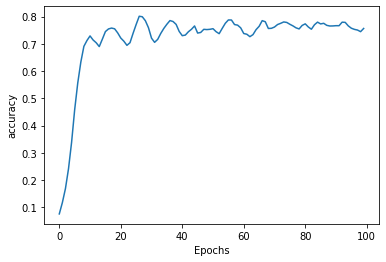

In [33]:
plot_graphs(history, 'accuracy')


In [54]:
print("tokenizer.index_word.items(): ", tokenizer.index_word.items())
print("tokenizer.word_index.items(): ", tokenizer.word_index.items())

tokenizer.index_word.items():  dict_items([(1, 'the'), (2, 'and'), (3, 'i'), (4, 'to'), (5, 'a'), (6, 'of'), (7, 'my'), (8, 'in'), (9, 'me'), (10, 'for'), (11, 'you'), (12, 'all'), (13, 'was'), (14, 'she'), (15, 'that'), (16, 'on'), (17, 'with'), (18, 'her'), (19, 'but'), (20, 'as'), (21, 'when'), (22, 'love'), (23, 'is'), (24, 'your'), (25, 'it'), (26, 'will'), (27, 'from'), (28, 'by'), (29, 'they'), (30, 'be'), (31, 'are'), (32, 'so'), (33, 'he'), (34, 'old'), (35, 'no'), (36, 'oh'), (37, 'ill'), (38, 'at'), (39, 'one'), (40, 'his'), (41, 'there'), (42, 'were'), (43, 'heart'), (44, 'down'), (45, 'now'), (46, 'we'), (47, 'where'), (48, 'young'), (49, 'never'), (50, 'go'), (51, 'come'), (52, 'then'), (53, 'did'), (54, 'not'), (55, 'said'), (56, 'away'), (57, 'their'), (58, 'sweet'), (59, 'them'), (60, 'green'), (61, 'if'), (62, 'take'), (63, 'our'), (64, 'like'), (65, 'night'), (66, 'day'), (67, 'o'), (68, 'out'), (69, 'fair'), (70, 'this'), (71, 'town'), (72, 'have'), (73, 'can'), (74

In [59]:
# My interpretation bec original code did not work
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predictedIdx = np.argmax(model.predict(token_list, verbose=0)) # Returns the indices of the maximum values along an axis.
	# print("predictedIdx", predictedIdx) # predictedIdx 152...
	output_word = tokenizer.index_word[predictedIdx] # dict_items([(1, 'the')
	print("output_word1: ", output_word) # output_word:  once
	seed_text += " " + output_word
print(seed_text)

# Original code
	# seed_text = "Laurence went to dublin"
	# next_words = 100
		
	# for _ in range(next_words):
		# token_list = tokenizer.texts_to_sequences([seed_text])[0]
		# token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
		# predicted = model.predict_classes(token_list, verbose=0)
		# output_word = ""
		# for word, index in tokenizer.word_index.items():
			# if index == predicted:
				# output_word = word
				# break
		# seed_text += " " + output_word
	#print(seed_text)

# Corrected code posted on Coursera: MUCH SIMPLER and BETTER
		# seed_text = "Laurence went to dublin"
		# next_words = 100
			
		# for _ in range(next_words):
			# token_list = tokenizer.texts_to_sequences([seed_text])[0]
			# token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
			# index = np.argmax(model.predict(token_list, verbose=0))
			# output_word = tokenizer.index_word[index]
			# seed_text += " " + output_word
		# print(seed_text)


  


output_word1:  once
output_word1:  my
output_word1:  auld
output_word1:  rigadoo
output_word1:  say
output_word1:  with
output_word1:  all
output_word1:  far
output_word1:  far
output_word1:  each
output_word1:  again
output_word1:  love
output_word1:  still
output_word1:  kept
output_word1:  hoping
output_word1:  calling
output_word1:  any
output_word1:  way
output_word1:  off
output_word1:  colonel
output_word1:  farrell
output_word1:  on
output_word1:  her
output_word1:  lips
output_word1:  lays
output_word1:  her
output_word1:  fingers
output_word1:  and
output_word1:  bells
output_word1:  will
output_word1:  raise
output_word1:  says
output_word1:  i
output_word1:  love
output_word1:  no
output_word1:  horse
output_word1:  any
output_word1:  wailing
output_word1:  traveled
output_word1:  all
output_word1:  girl
output_word1:  took
output_word1:  love
output_word1:  courted
output_word1:  so
output_word1:  a
output_word1:  hand
output_word1:  of
output_word1:  her
output_word1:  lo